In [1]:
%matplotlib inline

In [2]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
from configparser import ConfigParser
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
config = ConfigParser()
config.read([os.path.expanduser('config.ini')])

# host = config.get('mysql', 'host')
database = config.get('mysql', 'database')
user = config.get('mysql', 'user')
password = config.get('mysql', 'password')

localhost = config.get('ssh', 'localhost')
host = config.get('ssh', 'host')
ssh_user = config.get('ssh', 'ssh_user')
ssh_pass = config.get('ssh', 'ssh_pass')

In [4]:
def query(q):
    # print(host + ' ' + ssh_user + ' ' + ssh_pass)
    # print(localhost + ' ' + database + ' ' + user + ' ' + password)
    with SSHTunnelForwarder(
          (host, 22),
          ssh_username=ssh_user,
          # ssh_private_key=ssh_private_key,
          ssh_password=ssh_pass, 
          remote_bind_address=(localhost, 3306)
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)
          return pd.read_sql_query(q, conn)

In [5]:
df = query("select date_format(ins_ts,'%Y%m%d') as offerdate,count(1) as offercnt, count(DISTINCT productid) as distcnt from morri group by 1")

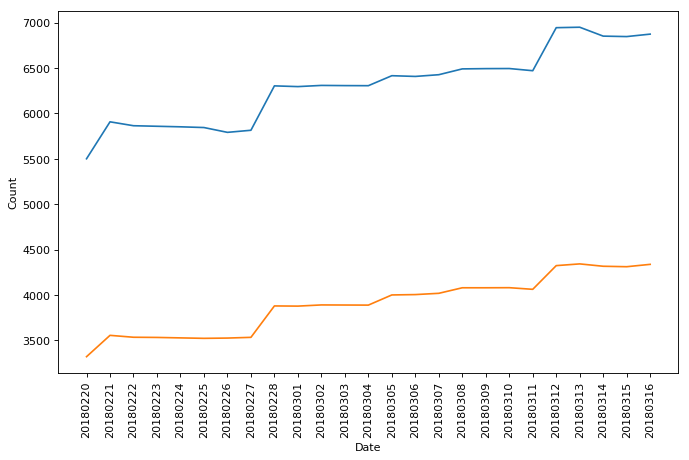

In [6]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.plot(df['offerdate'],df['offercnt'],df['distcnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [9]:
query_str1 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from occad  where lower(productdesc) like '%ocado%' or lower(productdesc) like '%waitrose%' group by 1"
query_str2 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from tesco  where lower(productdesc) like '%tesco%' group by 1"
query_str3 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from morri  where lower(productdesc) like '%morrisons%' group by 1"
query_str4 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from sains  where lower(productdesc) like '%sains%' group by 1"

query_str5 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from occad  where lower(productdesc) not like '%ocado%' and lower(productdesc) not like '%waitrose%' group by 1"
query_str6 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from tesco  where lower(productdesc) not like '%tesco%' group by 1"
query_str7 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from morri  where lower(productdesc) not like '%morrisons%' group by 1"
query_str8 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from sains  where lower(productdesc) not like '%sains%' group by 1"

df1 = query(query_str1)
df2 = query(query_str2)
df3 = query(query_str3)
df4 = query(query_str4)

df5 = query(query_str5)
df6 = query(query_str6)
df7 = query(query_str7)
df8 = query(query_str8)

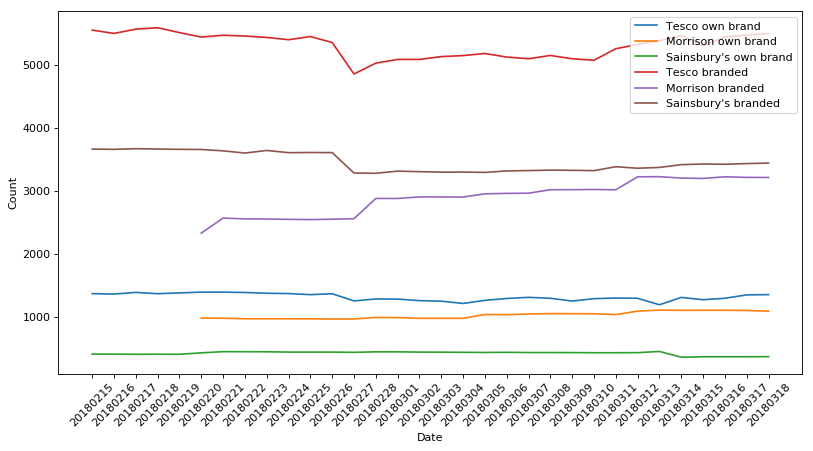

In [12]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=45)
# plt.plot(df1['offerdate'],df1['distcnt'], label="Ocado own brand")
plt.plot(df2['offerdate'],df2['distcnt'], label="Tesco own brand")
plt.plot(df3['offerdate'],df3['distcnt'], label="Morrison own brand")
plt.plot(df4['offerdate'],df4['distcnt'], label="Sainsbury's own brand")

# plt.plot(df5['offerdate'],df5['distcnt'], label="Ocado branded")
plt.plot(df6['offerdate'],df6['distcnt'], label="Tesco branded")
plt.plot(df7['offerdate'],df7['distcnt'], label="Morrison branded")
plt.plot(df8['offerdate'],df8['distcnt'], label="Sainsbury's branded")


#plt.step(df2['offerdate'],df2['distcnt'], label="Tesco own brand")
#plt.step(df3['offerdate'],df3['distcnt'], label="Morrison own brand")
#plt.step(df4['offerdate'],df4['distcnt'], label="Sainsbury's own brand")

#plt.step(df6['offerdate'],df6['distcnt'], label="Tesco branded")
#plt.step(df7['offerdate'],df7['distcnt'], label="Morrison branded")
#plt.step(df8['offerdate'],df8['distcnt'], label="Sainsbury's branded")


plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [18]:
query_str1 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from tesco  where lower(productdesc) not like '%tesco%' group by 1"
df1 = query(query_str1)

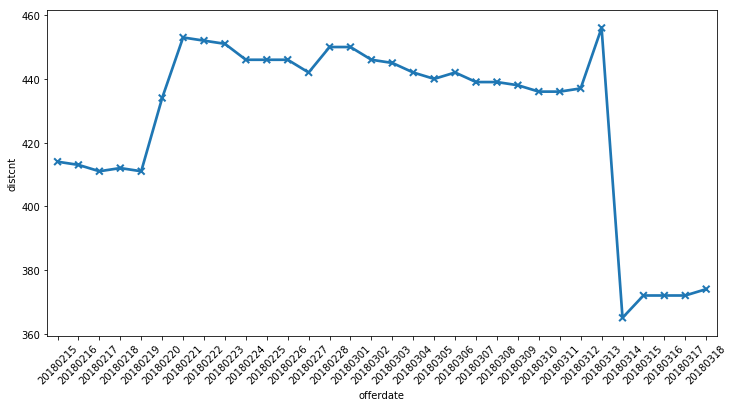

In [16]:
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.pointplot(x='offerdate', y='distcnt', data=df4, markers="x")

In [17]:
query_str1 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from tesco  where lower(productdesc) like '%tesco%' group by 1"
query_str2 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from sains  where lower(productdesc) like '%sains%' group by 1"
query_str3 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from morri  where lower(productdesc) like '%morrisons%' group by 1"
query_str4 = "select date_format(ins_ts,'%Y%m%d') offerdate, count(distinct productid) distcnt from occad  where lower(productdesc) like '%ocado%' or lower(productdesc) like '%waitrose%' group by 1"

df1 = query(query_str1)
df2 = query(query_str2)
df3 = query(query_str3)
df4 = query(query_str4)

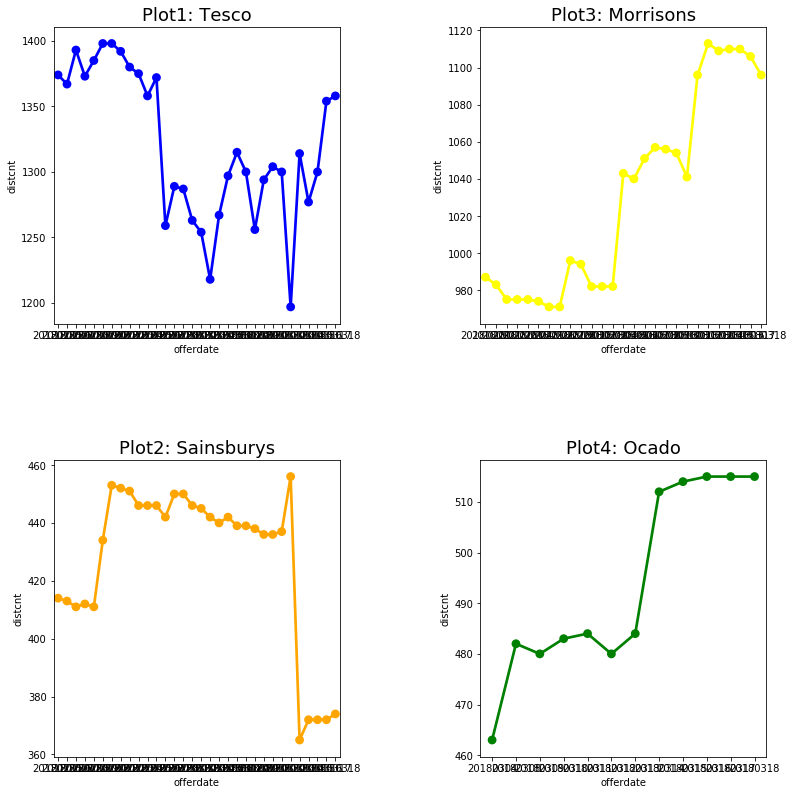

In [18]:
fig, axs = plt.subplots(2, 2, figsize = (12,12)) #plt.subplots() first two arguements are the number

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3) 
ax2 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (0, 4), rowspan=3, colspan=3)
ax4 = plt.subplot2grid((8,8), (4, 4), rowspan=3, colspan=3)

fig.tight_layout() # To understand how this works see point and link 3

ax1.set_title("Plot1: Tesco", fontsize =18)
ax2.set_title("Plot2: Sainsburys", fontsize =18)
ax3.set_title("Plot3: Morrisons", fontsize =18)
ax4.set_title("Plot4: Ocado", fontsize =18)

sns.pointplot(x='offerdate', y='distcnt', data=df1, color='blue', ax=ax1) 
sns.pointplot(x='offerdate', y='distcnt', data=df2, color='orange', ax=ax2) 
sns.pointplot(x='offerdate', y='distcnt', data=df3, color='yellow', ax=ax3) 
sns.pointplot(x='offerdate', y='distcnt', data=df4, color='green', ax=ax4) 